In [747]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Data Loading

In [820]:
df = pd.read_csv('data/df_out.csv')
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


# 2. Data Preparation

## 2.1. Data Formalization

In [821]:
# Выведем список колонок датасета
col = df.columns
col

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [822]:
# Выведем описательные статистики для всего датасета
df.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
count,1.000000e+04,10000,10000,10000,1.000000e+04,9964.000000,10000,9872,9937,10000.00000,9834,9955,9998,9998,10000,9902.000000,9902.000000,9998,10000,9998
unique,NaN,10000,393,405,NaN,NaN,40,3466,5,NaN,6,3,9081,9845,51,NaN,NaN,9957,3,9911
top,NaN,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,NaN,NaN,2021-04-19T10:00:54-0400,high,2021-04-22 15:01:24+00:00
freq,NaN,1,86,86,NaN,NaN,1638,151,8402,NaN,9518,7700,188,7,1108,NaN,NaN,2,3495,3
mean,7.311541e+09,NaN,NaN,NaN,2.067842e+04,2010.927941,NaN,NaN,NaN,93324.13400,NaN,NaN,NaN,NaN,NaN,38.594142,-94.165877,NaN,NaN,NaN
std,4.477653e+06,NaN,NaN,NaN,1.246230e+05,9.672040,NaN,NaN,NaN,63181.17499,NaN,NaN,NaN,NaN,NaN,5.844895,18.128504,NaN,NaN,NaN
min,7.208550e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN,NaN
25%,7.308189e+09,NaN,NaN,NaN,7.900000e+03,2008.000000,NaN,NaN,NaN,39147.25000,NaN,NaN,NaN,NaN,NaN,34.830368,-110.322086,NaN,NaN,NaN
50%,7.312757e+09,NaN,NaN,NaN,1.574950e+04,2013.000000,NaN,NaN,NaN,89000.00000,NaN,NaN,NaN,NaN,NaN,39.298522,-88.000050,NaN,NaN,NaN
75%,7.315274e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,136875.00000,NaN,NaN,NaN,NaN,NaN,42.428070,-80.830000,NaN,NaN,NaN


In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [824]:
#Посмотрим какие значения принимают переменные с характеристиками.
for i in col:
    print(f'Характеристика: {i}')
    print(f'Количество уникальных значений:{len(df[i].unique())}')
    print(f'Список значений:\n {df[i].value_counts()}\n')

Характеристика: id
Количество уникальных значений:10000
Список значений:
 7308295377    1
7316908621    1
7305833526    1
7316719384    1
7314440026    1
             ..
7305589280    1
7314411334    1
7307782698    1
7305083080    1
7311960763    1
Name: id, Length: 10000, dtype: int64

Характеристика: url
Количество уникальных значений:10000
Список значений:
 https://chattanooga.craigslist.org/ctd/d/chattanooga-2020-ram-2500-crew-cab-big/7308295377.html     1
https://boise.craigslist.org/ctd/d/boise-2015-volkswagen-jetta-18t-sport/7316908621.html            1
https://appleton.craigslist.org/cto/d/waupaca-1932-ford-replica-window-with/7305833526.html         1
https://goldcountry.craigslist.org/ctd/d/placerville-2017-chevy-chevrolet/7316719384.html           1
https://roanoke.craigslist.org/ctd/d/roanoke-2012-chevrolet-chevy-impala/7314440026.html            1
                                                                                                   ..
https://harrisonburg.cra

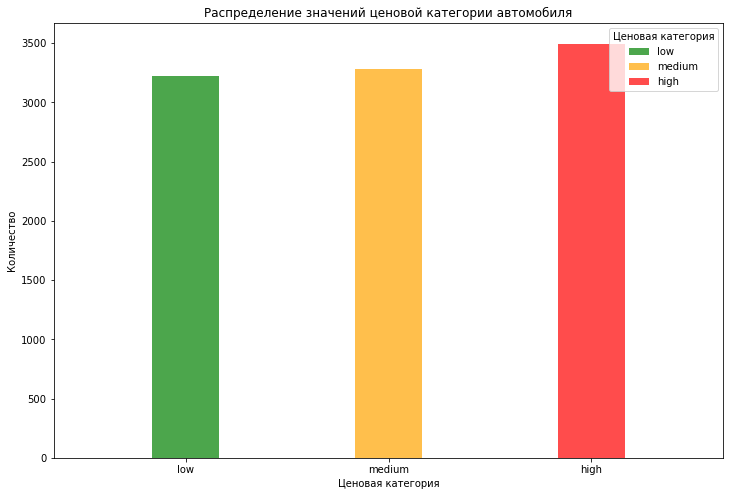

In [825]:
# Целевой переменной является price_category. Визуализируем ее распределение.
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['price_category'], bins=3, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Ценовая категория')
plt.title('Распределение значений ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

Распределение равномерное

## 2.2. Exploratory Data Analysis. Data Cleaning

In [826]:
# Выведем количество полностью заполненных объектов и их процент из всей выборки.
full_values = len(df.dropna())
percent_full = round(full_values * 100 / len(df), 2)
print(f'Процент полностью заполненных объектов значений: {full_values}, их процент составляет: {percent_full}%')

Процент полностью заполненных объектов значений: 9507, их процент составляет: 95.07%


In [827]:
#  Выведем процент пропущенных значений для каждого признака, отсортируем признаки по убыванию процента пропущенных значений.
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:\n', missing_values)

Процент пропущенных значений:
 title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64


### Обработка пропусков в дате

In [828]:
df[df.date.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


In [829]:
# Т.к. строчки не информативные удалим их 
df_new = df.dropna(subset = ['date'])
print("Количество пропущенных значений в date:", df_new.date.isna().sum())
df_new.shape

Количество пропущенных значений в date: 0


(9998, 20)

### Обработка пропусков в годе выпуска

In [830]:
df_new[df_new.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [831]:
# Пропущенные значения можно заполнить из столбца description, кроме строки 2629 - ее удалим.
df_new.drop(labels = [2629],axis = 0, inplace = True)
year_desc = df_new[df_new.year.isna()].description.str.split(expand = True).iloc[:,0]
df_new.year = df_new.year.fillna(year_desc)
print("Количество пропущенных значений в year:", df_new.year.isna().sum())
df_new.shape

Количество пропущенных значений в year: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

In [832]:
# Преобразуем тип данных в столбце year
df_new.year = df_new.year.astype('int')
df_new.year.dtype

dtype('int32')

### Обработка пропусков в типе трансмиссии 

In [833]:
# Обработка пропусков в трансмиссии
df_new[df_new.transmission.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013,volkswagen,jetta,diesel,96115,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium,2021-04-22 21:55:57+00:00
1349,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005,honda,pilot,gas,261591,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low,2021-04-08 23:52:48+00:00
1715,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007,ford,mustang,gas,159342,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low,2021-04-21 15:30:46+00:00
1914,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012,jeep,grand cherokee,gas,116079,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium,2021-04-16 18:46:41+00:00
2023,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004,ford,ranger,gas,156969,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low,2021-04-29 23:30:13+00:00


In [834]:
# Посмотрим на возможные значения столбца
df_new.transmission.value_counts()

automatic    7700
other        1623
manual        631
Name: transmission, dtype: int64

In [835]:
# Заполним пропущеные значения трансмиссии значением other
df_new.transmission = df_new.transmission.fillna('other')
print("Количество пропущенных значений в transmission:", df_new.transmission.isna().sum())
df_new.shape

Количество пропущенных значений в transmission: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

### Обработка пропусков в типе топлива

In [836]:
df_new[df_new.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,2019,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,7313576130,https://cnj.craigslist.org/ctd/d/parlin-2012-j...,central NJ,https://cnj.craigslist.org,23500,2012,jeep,wrangler unlimited 4wd 4dr sahara,NaN,105927,clean,automatic,https://images.craigslist.org/00u0u_erwAahcIeQ...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-27T18:15:18-0400,high,2021-04-27 22:15:18+00:00
9446,7309365699,https://fortmyers.craigslist.org/chl/ctd/d/bra...,ft myers / SW florida,https://fortmyers.craigslist.org,14997,2010,ford,e-350,NaN,153120,clean,manual,https://images.craigslist.org/00606_hQvq6K6D4p...,"2010 *Ford* *E-350* 12 Passenger Van - $14,997...",fl,27.479823,-82.571497,2021-04-19T14:01:14-0400,medium,2021-04-19 18:01:14+00:00
9636,7313475467,https://eugene.craigslist.org/ctd/d/eugene-201...,eugene,https://eugene.craigslist.org,9979,2012,chevrolet,equinox awd 4dr lt w/1lt,NaN,165554,clean,automatic,https://images.craigslist.org/00q0q_haS6HKqYq4...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-27T12:10:24-0700,medium,2021-04-27 19:10:24+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012,honda,accord,NaN,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00


In [837]:
# Посмотрим на возможные значения столбца
df_new.fuel.value_counts()

gas         8402
other        729
diesel       653
hybrid       108
electric      44
Name: fuel, dtype: int64

In [838]:
# Заполним пропущеные значения типа топлива значением other
df_new.fuel = df_new.fuel.fillna('other')
print("Количество пропущенных значений в fuel:", df_new.fuel.isna().sum())
df_new.shape

Количество пропущенных значений в fuel: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

### Обработка пропусков в столбцах lat и long 

In [839]:
# Пропуски в столбцах lat и long совпадают по строкам
df_new[df_new.lat.isna() & df_new.long.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [840]:
# Поскольку ценообразование в пределах одного штата не должно отличаться, заполним пропущенные значения долготы и широты
# средним значением для каждого штата соответственно
state_mean = df_new.groupby('state').mean()[['long', 'lat']]
long_lat = df_new[df_new.lat.isna() & df_new.long.isna()][['state']].join(state_mean, on = 'state', lsuffix = '_r')
df_new.long = df_new.long.fillna(long_lat.long)
df_new.lat = df_new.lat.fillna(long_lat.lat)
print("Количество пропущенных значений в long:", df_new.long.isna().sum())
print("Количество пропущенных значений в lat:", df_new.lat.isna().sum())
df_new.shape

Количество пропущенных значений в long: 0
Количество пропущенных значений в lat: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

### Обработка пропусков в модели авто

In [841]:
df_new[df_new.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [842]:
df_new.groupby('manufacturer', group_keys=True).apply(lambda x: x)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


In [843]:
# Заполним пропущеные значения модели значением unknown
df_new.model = df_new.model.fillna('unknown')
print("Количество пропущенных значений в model:", df_new.model.isna().sum())
df_new.shape

Количество пропущенных значений в model: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

### Обработка пропусков в  статусе автомобиля

In [844]:
df_new[df_new.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012,honda,accord,other,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


In [845]:
# Посмотрим на возможные значения столбца
df_new.title_status.value_counts()

clean         9517
rebuilt        171
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [846]:
# Заполним пропущеные значения модели самым поплярным значением 
df_new.title_status =  df_new.title_status.fillna(df.title_status.mode()[0])
print("Количество пропущенных значений в title_status:", df_new.title_status.isna().sum())
df_new.shape

Количество пропущенных значений в title_status: 0


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(9997, 20)

In [847]:
# Выведем количество полностью заполненных объектов и их процент из всей выборки.
full_values = len(df_new.dropna())
percent_full = round(full_values * 100 / len(df_new), 2)
print(f'Процент полностью заполненных объектов значений: {full_values}, их процент составляет: {percent_full}%')

Процент полностью заполненных объектов значений: 9997, их процент составляет: 100.0%


### Обработка дат и типов данных

In [848]:

# Преобразуем столбцы fuel, transmission aи manufacturer в категориальный тип данных
df_new.fuel = pd.Series(df_new.fuel, dtype="category")
df_new.transmission = pd.Series(df_new.transmission, dtype="category")
df_new.manufacturer = pd.Series(df_new.manufacturer, dtype="category")


In [849]:
# В датафрейме есть два столбца дублирующих друг друга с датами, удалим столбец posting_date. 
# Также удалим столбец с id, т.к. он не несет никакой полезной информации
df_new.drop(columns = ['posting_date', 'id'], inplace = True)
df_new

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,price_category,date
0,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00
1,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00
2,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00
3,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00
4,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,low,2021-04-10 20:33:57+00:00
9996,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,medium,2021-05-03 13:36:30+00:00
9997,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,low,2021-04-22 19:14:01+00:00
9998,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,high,2021-04-14 14:14:42+00:00


In [850]:
# Удалим столбцы с url, region_url, image_url, description, т.к. они не несут никакой полезной информации. Также удалим 
# столбец model, т.к. данные в нем не всегда отосятся к модели, а также существует большая инвариантность значений
df_new.drop(columns = ['url', 'region_url', 'image_url', 'description', 'model'], inplace = True)
df_new

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,region,price,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
0,chattanooga,54990,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00
1,north jersey,16942,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00
2,reno / tahoe,35590,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00
3,fayetteville,14500,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00
4,new york city,21800,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chautauqua,4495,2002,toyota,gas,150000,clean,automatic,ny,42.123900,-79.189500,low,2021-04-10 20:33:57+00:00
9996,binghamton,14495,2008,jeep,gas,113573,clean,other,ny,43.216990,-77.755610,medium,2021-05-03 13:36:30+00:00
9997,salem,8995,2011,audi,gas,150184,clean,automatic,or,44.925908,-122.982753,low,2021-04-22 19:14:01+00:00
9998,madison,31900,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,-89.397796,high,2021-04-14 14:14:42+00:00


In [851]:
# Удалим столбец region, т.к. столбец state более информационный

df_new.drop(columns = ['region'], inplace = True)


C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Поиск выбросов

In [852]:
# Для численных переменных найдем есть ли аномальные значения
def calculate_outliers(data, column):
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries
for i in df_new.describe().columns:
    out = calculate_outliers(df_new, i)
    anomaly_count = len(df_new[(df_new[i] > out[1]) | (df_new[i] < out[0])])
    print (f'Количество аномалий в столбце {i}: {anomaly_count}')


Количество аномалий в столбце price: 215
Количество аномалий в столбце year: 394
Количество аномалий в столбце odometer: 91
Количество аномалий в столбце lat: 143
Количество аномалий в столбце long: 59


Что делать с выбросами решим на этапе Data Visualization

## 2.3. Data Visualization 

### Исследование числовых колонок и их выбросов 

#### Столбец price

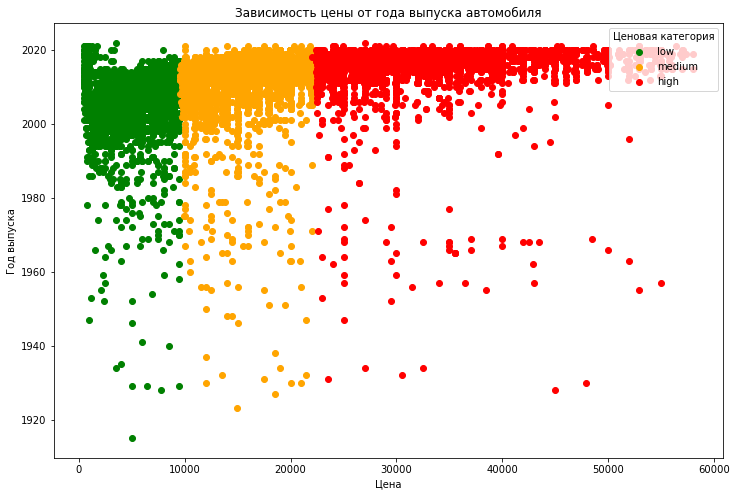

In [853]:
# Построим диаграмму рассеяния для стоимости автомобиля и его года выпуска. Без учета выбросов. 
# Раскрасим каждую точку (автомобиль) согласно ценовой категории автомобиля.
out = calculate_outliers(df_new, 'price')
df_in = df_new[(df_new.price <= out[1]) & (df_new.price >= out[0])]
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_in[df_in['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category)

ax.legend(loc='upper right', title="Ценовая категория")
plt.title("Зависимость цены от года выпуска автомобиля")
plt.xlabel('Цена')
plt.ylabel('Год выпуска')
plt.show()

In [854]:
# Из графика выше можно увидеть, что цена практически полность определяет ценовую категорию, чтобы 
# качественно исследовать влияние других признаков на ценовую категория столбец с ценой удалим
df_new.drop(columns = 'price', inplace = True)
df_new

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
0,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00
1,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00
2,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00
3,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00
4,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...
9995,2002,toyota,gas,150000,clean,automatic,ny,42.123900,-79.189500,low,2021-04-10 20:33:57+00:00
9996,2008,jeep,gas,113573,clean,other,ny,43.216990,-77.755610,medium,2021-05-03 13:36:30+00:00
9997,2011,audi,gas,150184,clean,automatic,or,44.925908,-122.982753,low,2021-04-22 19:14:01+00:00
9998,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,-89.397796,high,2021-04-14 14:14:42+00:00


In [855]:
# Удалим дубликаты, если такие есть
df_new = df_new.drop_duplicates()
df_new

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
0,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00
1,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00
2,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00
3,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00
4,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...
9995,2002,toyota,gas,150000,clean,automatic,ny,42.123900,-79.189500,low,2021-04-10 20:33:57+00:00
9996,2008,jeep,gas,113573,clean,other,ny,43.216990,-77.755610,medium,2021-05-03 13:36:30+00:00
9997,2011,audi,gas,150184,clean,automatic,or,44.925908,-122.982753,low,2021-04-22 19:14:01+00:00
9998,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,-89.397796,high,2021-04-14 14:14:42+00:00


Дубликатов не оказалось

#### Столбец год 

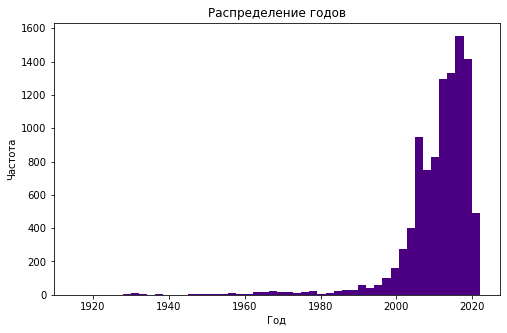

In [856]:
# Построим диаграмму распределения годов

plt.figure(figsize=(8, 5))
plt.hist(df_new.year, color='indigo', bins = 50)
plt.xlabel('Год')
plt.ylabel('Частота')
plt.title('Распределение годов');

In [857]:
out = calculate_outliers(df_new, 'year')
df_year_out = df_new[(df_new.year > out[1]) | (df_new.year < out[0])].sort_values(by = 'year')
df_year_out

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
401,1915,ford,gas,12345,clean,manual,mt,45.626200,-109.257100,low,2021-04-18 18:20:03+00:00
6342,1923,ford,gas,15000,clean,automatic,ks,38.982900,-93.975700,medium,2021-04-29 17:12:18+00:00
5014,1927,chevrolet,gas,100,clean,manual,az,34.571326,-112.104943,medium,2021-04-26 20:52:28+00:00
6329,1928,other,gas,100,clean,automatic,az,32.188659,-110.769482,low,2021-05-03 21:52:05+00:00
6476,1928,ford,gas,2520,clean,automatic,ny,43.273081,-77.795563,high,2021-04-26 13:39:22+00:00
...,...,...,...,...,...,...,...,...,...,...,...
2361,1994,jeep,gas,108000,clean,manual,ga,31.501304,-82.849355,low,2021-04-18 21:51:10+00:00
8784,1994,other,gas,58000,clean,automatic,ia,41.545400,-96.161700,low,2021-04-30 22:40:12+00:00
9013,1994,ford,gas,94686,clean,other,oh,41.386600,-81.442100,low,2021-05-04 19:06:57+00:00
1380,1994,ford,gas,0,clean,automatic,nc,35.366400,-77.922100,low,2021-04-22 11:35:07+00:00


In [858]:
# Выведем количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом.
df_new[(df_new.year > out[1]) | (df_new.year < out[0])].price_category.value_counts()

low       181
medium    135
high       78
Name: price_category, dtype: int64

Среди выбросов чаще встречаются авто с low категорией цены, что в полне нормально для старых авто. 

In [859]:
# Так как выбросы в годе выпуска находятся среди минимальных значений, заполним те значения, которые являются выбросами, 
# значением нижней границы. Создаим копию датафрейма на этом этапе. Выведем описательные характеристики для проверки
df_copy = df_new.copy()
df_new.loc[(df['year'] < out[0]), 'year'] = int(out[0] // 1 + 1)
df_new.describe()

,year,odometer,lat,long
count,9997.000000,9997.000000,9997.000000,9997.000000
mean,2011.733920,93332.999000,38.577258,-94.046827
std,6.416065,63183.751534,5.831077,18.098871
min,1995.000000,0.000000,-67.144243,-158.069300
25%,2008.000000,39149.000000,34.844585,-108.572700
50%,2013.000000,89000.000000,39.260000,-87.947800
75%,2017.000000,136875.000000,42.393211,-80.721251
max,2022.000000,283466.000000,64.947500,173.885502


#### Столбец одометр 

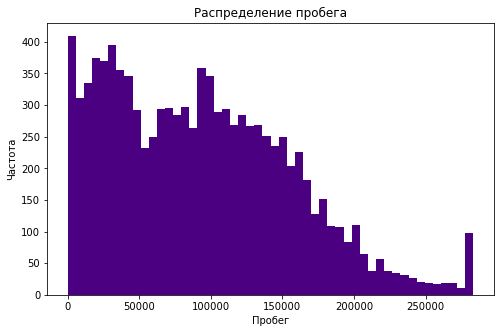

In [860]:
# Построим диаграмму распределения пробега

plt.figure(figsize=(8, 5))
plt.hist(df_new.odometer, color='indigo', bins = 50)
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.title('Распределение пробега');

In [861]:
out = calculate_outliers(df_new, 'odometer')
df_odometer_out = df_new[(df_new.odometer > out[1]) | (df_new.odometer < out[0])].sort_values(by = 'odometer', ascending = True)
df_odometer_out.head(60)

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
27,2003,dodge,diesel,283466,clean,automatic,tx,31.270000,-94.646900,medium,2021-04-23 19:27:25+00:00
6810,2000,gmc,gas,283466,clean,automatic,mi,43.608800,-83.953000,low,2021-04-25 23:21:29+00:00
6809,2008,ford,diesel,283466,clean,automatic,tx,29.649500,-98.613700,medium,2021-04-27 16:28:59+00:00
6778,2016,other,diesel,283466,clean,manual,ca,37.780800,-121.234400,high,2021-04-25 06:09:42+00:00
6760,2005,nissan,gas,283466,clean,automatic,in,40.130900,-85.653600,low,2021-04-26 04:59:41+00:00
6756,2009,chevrolet,gas,283466,clean,automatic,or,45.671100,-121.539100,medium,2021-05-03 16:24:07+00:00
6643,2010,mercedes-benz,diesel,283466,clean,automatic,il,38.524400,-90.274500,medium,2021-05-04 17:24:09+00:00
6488,1997,honda,gas,283466,clean,manual,va,36.712400,-78.153400,low,2021-05-03 16:04:00+00:00
6478,1996,other,other,283466,clean,manual,wi,40.733801,-111.913084,high,2021-04-29 20:22:14+00:00
6149,2006,other,diesel,283466,clean,manual,il,41.509400,-87.824800,low,2021-05-03 15:36:43+00:00


In [862]:
df_new[(df_new.odometer > out[1]) | (df_new.odometer < out[0])].price_category.value_counts()

low       54
medium    23
high      14
Name: price_category, dtype: int64

Среди выбросов чаще встречаются авто с low категорией цены, что вполне нормально для авто c большим пробегом. 
Но значение максимального пробега встречается очень часто, это явный признак выброса удалим из датафрейма эти значения. И снова
посмотрим на выбросы

In [863]:
df_new = df_new[df_new.odometer != df_new.odometer.max()]
out = calculate_outliers(df_new, 'odometer')
df_odometer_out = df_new[(df_new.odometer > out[1]) | (df_new.odometer < out[0])].sort_values(by = 'odometer', ascending = True)
df_odometer_out.head(60)

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
549,2003,mitsubishi,gas,280000,salvage,manual,ca,36.517845,-121.438665,low,2021-04-11 20:52:52+00:00
3884,2004,chevrolet,gas,280000,clean,automatic,sc,33.876800,-78.650800,low,2021-04-08 14:18:45+00:00
4334,2000,ford,diesel,280000,clean,automatic,ny,42.968500,-78.749200,low,2021-04-26 00:16:55+00:00
7776,1997,toyota,gas,280000,clean,automatic,az,32.311200,-110.917900,low,2021-05-04 16:05:17+00:00
6955,2003,ram,diesel,283324,clean,automatic,mn,46.160037,-91.727600,medium,2021-04-25 14:03:24+00:00


In [864]:
# Так как выбросы в годе выпуска находятся среди максимальных значений, заполним те значения, которые являются выбросами, 
# значением верхней границы. Создаим копию датафрейма на этом этапе. Выведем описательные характеристики для проверки
df_copy = df_new.copy()
df_new.loc[(df['odometer'] > out[1]), 'odometer'] = int(out[0] // 1 + 1)
df_new.describe()

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,year,odometer,lat,long
count,9906.000000,9906.000000,9906.000000,9906.000000
mean,2011.787301,91391.273572,38.587012,-94.018251
std,6.390212,60788.826776,5.826062,18.111128
min,1995.000000,-105861.000000,-67.144243,-158.069300
25%,2008.000000,38628.250000,34.894854,-108.572700
50%,2013.000000,87813.500000,39.264400,-87.891832
75%,2017.000000,135068.750000,42.397478,-80.690000
max,2022.000000,278000.000000,64.947500,173.885502


#### Столбцы широты и долготы 

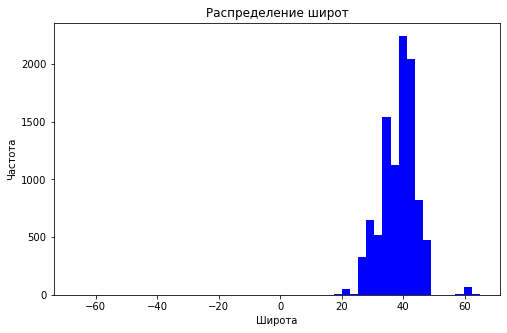

In [865]:
# Построим диаграмму широты

plt.figure(figsize=(8, 5))
plt.hist(df_new.lat, color='blue', bins = 50)
plt.xlabel('Широта')
plt.ylabel('Частота')
plt.title('Распределение широт');

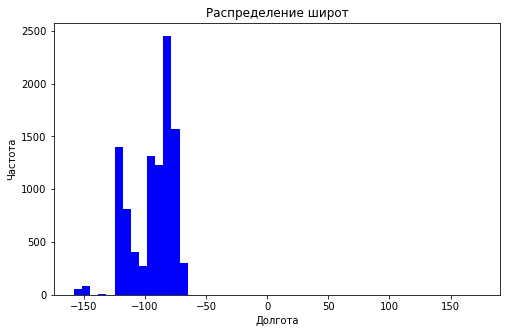

In [866]:
# Построим диаграмму долготы

plt.figure(figsize=(8, 5))
plt.hist(df_new.long, color='blue', bins = 50)
plt.xlabel('Долгота')
plt.ylabel('Частота')
plt.title('Распределение широт');

In [867]:
out = calculate_outliers(df_new, 'lat')
df_lat_out = df_new[(df_new.lat > out[1]) | (df_new.lat < out[0])].sort_values(by = 'lat', ascending = True)
df_lat_out

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
498,2020,chevrolet,gas,5,clean,automatic,ak,-67.144243,173.885502,high,2021-04-17 01:36:27+00:00
9277,2006,acura,gas,148000,clean,automatic,hi,19.541726,-155.098036,low,2021-05-01 10:03:14+00:00
3171,2007,ford,gas,165302,clean,automatic,hi,19.570449,-154.956772,low,2021-05-02 00:31:50+00:00
8755,2021,kia,gas,16,clean,automatic,hi,19.641782,-155.995775,high,2021-04-28 20:01:59+00:00
631,2002,toyota,gas,158000,clean,automatic,hi,19.673041,-155.222806,medium,2021-04-30 08:30:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
8052,2018,kia,gas,18321,clean,automatic,ak,64.815520,-147.712930,medium,2021-04-24 18:08:26+00:00
837,2019,chevrolet,gas,13292,clean,automatic,ak,64.815520,-147.712930,high,2021-04-09 02:02:15+00:00
8897,2017,toyota,gas,53715,clean,automatic,ak,64.815520,-147.712930,high,2021-04-09 03:02:18+00:00
1558,2005,ford,diesel,48000,lien,automatic,ak,64.837800,-147.716400,medium,2021-04-24 16:40:12+00:00


In [868]:
out = calculate_outliers(df_new, 'long')
df_long_out = df_new[(df_new.long > out[1]) | (df_new.long < out[0])].sort_values(by = 'long', ascending = True)
df_long_out

,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,date
15,2004,chevrolet,diesel,113000,clean,automatic,hi,21.631200,-158.069300,high,2021-05-04 21:01:47+00:00
6454,2004,toyota,gas,128748,clean,automatic,hi,21.494467,-158.029819,low,2021-05-03 22:30:12+00:00
9201,2018,kia,gas,12447,clean,automatic,hi,21.377105,-158.023701,high,2021-05-04 20:03:47+00:00
156,2015,rover,gas,26600,clean,automatic,hi,21.378420,-158.022410,high,2021-05-02 00:35:04+00:00
450,2007,volkswagen,gas,112000,clean,automatic,hi,21.453100,-158.017400,low,2021-05-02 20:13:18+00:00
6924,2019,jeep,gas,30480,clean,automatic,hi,21.398200,-158.012400,high,2021-04-28 03:20:33+00:00
9439,2015,jeep,gas,45380,clean,automatic,hi,21.398200,-158.012400,high,2021-04-27 23:15:21+00:00
8907,2019,toyota,gas,5600,clean,automatic,hi,21.327400,-158.010300,high,2021-04-30 21:55:02+00:00
2044,2007,mercedes-benz,gas,30515,clean,automatic,hi,21.403933,-157.980453,medium,2021-05-03 21:07:28+00:00
7533,1995,toyota,gas,239000,clean,automatic,hi,21.390800,-157.933200,low,2021-05-02 21:43:55+00:00


Выбросов по широте и долготе нет, т.к. координаты соответствуют территории США. В двух сторках перепутаны знаки. Исправим это.
Остальные аномальные значения относятся к Аляске и Гавайям.

In [869]:
df_new.loc[8739, 'long'] = -df_new.loc[8739, 'long']
df_new.loc[498, 'long'] = -df_new.loc[498, 'long']
df_new.loc[498, 'lat'] = -df_new.loc[498, 'lat']

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Визуализация категориальных переменных

#### Столбец производителя

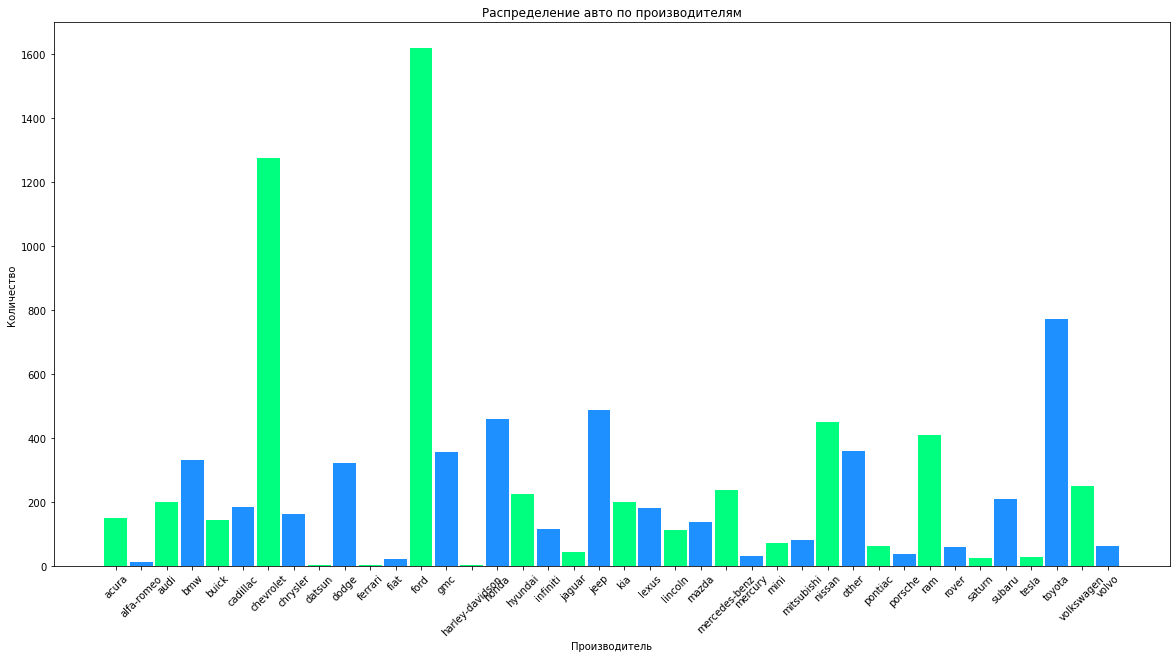

In [870]:
df_manufacturer = df_new.groupby(['manufacturer'], as_index=False)[['year']].count()
df_manufacturer = df_manufacturer.rename(columns={'year': 'count'})
plt.figure(figsize=(20, 10))
plt.bar(df_manufacturer['manufacturer'], df_manufacturer['count'], color=['springgreen', 'dodgerblue'], width = 0.9)
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.title('Распределение авто по производителям');

#### Столбец топливо

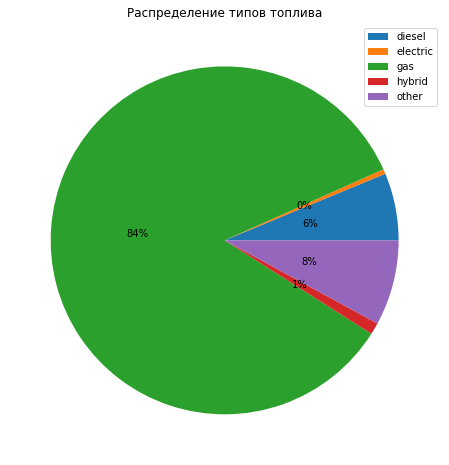

In [871]:
df_fuel = df_new.groupby(['fuel'], as_index=False)[['year']].count()
df_fuel = df_fuel.rename(columns={'year': 'count'})
plt.figure(figsize=(12, 8))
plt.pie(df_fuel['count'], labels=df_fuel['fuel'], labeldistance=None, autopct = '%1.0f%%', 
        pctdistance=0.5)
plt.title("Распределение типов топлива")
plt.legend()
plt.show();

#### Столбец статуса автомобиля

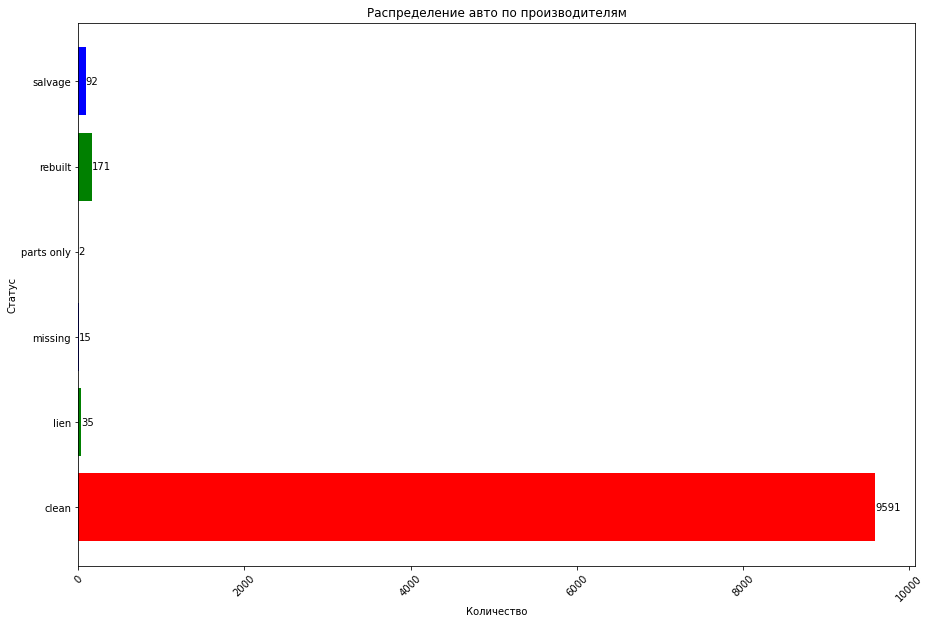

In [872]:
df_title_status = df_new.groupby(['title_status'], as_index=False)[['year']].count()
df_title_status = df_title_status.rename(columns={'year': 'count'})
fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.barh(df_title_status['title_status'], df_title_status['count'], color=['red', 'green' , 'blue'])
ax.bar_label(bars)
plt.xlabel('Количество')
plt.ylabel('Статус')
plt.xticks(rotation = 45)
plt.title('Распределение авто по производителям');

#### Столбец типа трансмиссии 

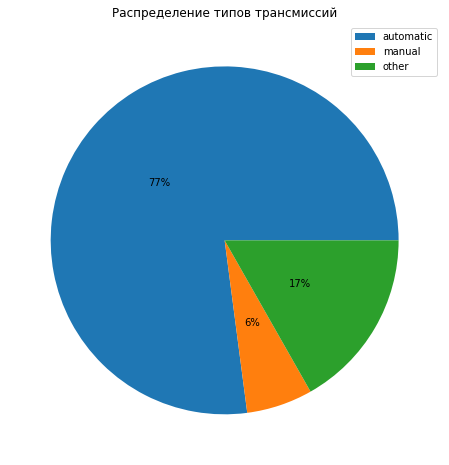

In [873]:
df_transmission = df_new.groupby(['transmission'], as_index=False)[['year']].count()
df_transmission = df_transmission.rename(columns={'year': 'count'})
plt.figure(figsize=(12, 8))
plt.pie(df_transmission['count'], labels=df_transmission['transmission'], labeldistance=None, autopct = '%1.0f%%', 
        pctdistance=0.5)
plt.title("Распределение типов трансмиссий")
plt.legend()
plt.show();

#### Столбец штата

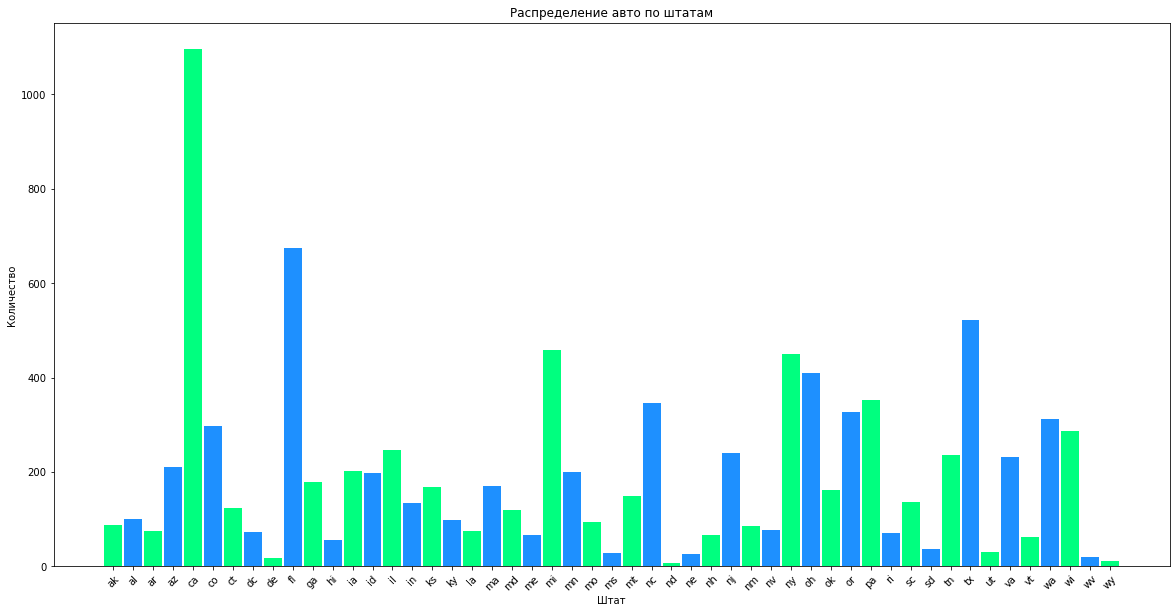

In [874]:
df_state = df_new.groupby(['state'], as_index=False)[['year']].count()
df_state = df_state.rename(columns={'year': 'count'})
plt.figure(figsize=(20, 10))
plt.bar(df_state['state'], df_state['count'], color=['springgreen', 'dodgerblue'], width = 0.9)
plt.xlabel('Штат')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.title('Распределение авто по штатам');

# 3. Feature engineering

## 3.1. Преобразование категориальных переменных

In [875]:
category = ['transmission', 'manufacturer', 'state', 'title_status', 'fuel']
data = df_new[category]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_category = ohe.transform(data)
df_new[ohe.get_feature_names()] = ohe_category
df_new.head()

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,...,x3_lien,x3_missing,x3_parts only,x3_rebuilt,x3_salvage,x4_diesel,x4_electric,x4_gas,x4_hybrid,x4_other
0,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 3.2 Стандартизация данных

In [876]:
counts = ['lat', 'long', 'year', 'odometer']
data1 = df_new[counts]
std_scaler = StandardScaler()
std_scaler.fit(data1)
std_scaled = std_scaler.transform(data1)
counts_new = [f'{el}_std' for el in counts]
df_new[counts_new] = std_scaled
df_new.head()

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,...,x3_salvage,x4_diesel,x4_electric,x4_gas,x4_hybrid,x4_other,lat_std,long_std,year_std,odometer_std
0,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.617334,0.494889,1.285265,-1.052044
1,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,...,0.0,0.0,0.0,0.0,0.0,1.0,0.387295,1.122480,0.659276,-0.516046
2,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.840652,0.541907,0.815773,-1.272391
3,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.502961,0.864817,0.189784,0.426082
4,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,...,0.0,0.0,0.0,1.0,0.0,0.0,0.358176,1.147849,1.441762,-1.371888


## 3.3 Признаки на основе дат

In [877]:
df_new1 = df_new.copy()
df_new.isnull().values.any()
df_new.date = pd.to_datetime(df_new.date)
df_new['month'] = df_new.date.dt.month
df_new['dayofweek'] = df_new.date.dt.dayofweek

C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Msi-1\AppData\Local\Temp/ipykernel_9668/2540152829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new.date.dt.month
C:\Users\Msi-1\AppData\Local\Temp/ipykernel_9668/2540152829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [880]:
df_new['diff_years'] = df_new.date.dt.year - df_new.year
data3 = df_new[['month', 'dayofweek', 'diff_years']]
std_scaler = StandardScaler()
std_scaler.fit(data3)
std_scaled = std_scaler.transform(data3)
df_new[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled
df_new

C:\Users\Msi-1\AppData\Local\Temp/ipykernel_9668/3435489219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['diff_years'] = df_new.date.dt.year - df_new.year
C:\Users\Msi-1\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,long,price_category,...,lat_std,long_std,year_std,odometer_std,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,2020,ram,diesel,27442,clean,other,tn,35.060000,-85.250000,high,...,-0.617334,0.494889,1.285265,-1.052044,4,5,1,-0.612741,1.115187,-1.285265
1,2016,ford,other,60023,clean,automatic,nj,40.821805,-74.061962,medium,...,0.387295,1.122480,0.659276,-0.516046,5,0,5,1.632012,-1.373558,-0.659276
2,2017,volkswagen,gas,14048,clean,other,ca,33.779214,-84.411811,high,...,-0.840652,0.541907,0.815773,-1.272391,4,2,4,-0.612741,-0.378060,-0.815773
3,2013,toyota,gas,117291,clean,automatic,nc,35.715954,-78.655304,medium,...,-0.502961,0.864817,0.189784,0.426082,4,5,8,-0.612741,1.115187,-0.189784
4,2021,nissan,gas,8000,clean,automatic,ny,40.654800,-73.609700,medium,...,0.358176,1.147849,1.441762,-1.371888,5,0,0,1.632012,-1.373558,-1.441762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2002,toyota,gas,150000,clean,automatic,ny,42.123900,-79.189500,low,...,0.614328,0.834852,-1.531685,0.964185,4,5,19,-0.612741,1.115187,1.531685
9996,2008,jeep,gas,113573,clean,other,ny,43.216990,-77.755610,medium,...,0.804919,0.915285,-0.592702,0.364917,5,0,13,1.632012,-1.373558,0.592702
9997,2011,audi,gas,150184,clean,automatic,or,44.925908,-122.982753,low,...,1.102886,-1.621722,-0.123210,0.967212,4,3,10,-0.612741,0.119689,0.123210
9998,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,-89.397796,high,...,0.772239,0.262219,0.502779,-0.484460,4,2,6,-0.612741,-0.378060,-0.502779


## 

In [883]:
# Удалим лишние столбцы
df_corr = df_new.drop(columns = ['month', 'dayofweek', 'diff_years', 'year', 'manufacturer', 'fuel', 'odometer', 'title_status',
       'transmission', 'state', 'lat', 'long', 'date'])
df_corr

,price_category,x0_automatic,x0_manual,x0_other,x1_acura,x1_alfa-romeo,x1_audi,x1_bmw,x1_buick,x1_cadillac,...,x4_gas,x4_hybrid,x4_other,lat_std,long_std,year_std,odometer_std,month_std,dayofweek_std,diff_years_std
0,high,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.617334,0.494889,1.285265,-1.052044,-0.612741,1.115187,-1.285265
1,medium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.387295,1.122480,0.659276,-0.516046,1.632012,-1.373558,-0.659276
2,high,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.840652,0.541907,0.815773,-1.272391,-0.612741,-0.378060,-0.815773
3,medium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.502961,0.864817,0.189784,0.426082,-0.612741,1.115187,-0.189784
4,medium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.358176,1.147849,1.441762,-1.371888,1.632012,-1.373558,-1.441762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,low,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.614328,0.834852,-1.531685,0.964185,-0.612741,1.115187,1.531685
9996,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.804919,0.915285,-0.592702,0.364917,1.632012,-1.373558,0.592702
9997,low,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.102886,-1.621722,-0.123210,0.967212,-0.612741,0.119689,0.123210
9998,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.772239,0.262219,0.502779,-0.484460,-0.612741,-0.378060,-0.502779


In [884]:
df_corr.to_csv('df_corr.csv', index = False)

# 4. Modelling

## 4.1. Подготовка данных

In [891]:
# df_corr = pd.read_csv('df_corr.csv')
x = df_corr.drop(columns = ['price_category'])
y = df_corr['price_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 4.2. Логистическая регрессия

In [1022]:
logreg = LogisticRegression(random_state=42, penalty = 'none', max_iter = 98, n_jobs = 5)
logreg.fit(x_train, y_train)
pred = logreg.predict(x_train)
print(f'Логистическая регрессия на тренировочный данных: {accuracy_score(y_train, pred)}')
logreg_pred = logreg.predict(x_test)
print(f'Логистическая регрессия на тестовых данных: {accuracy_score(y_test, logreg_pred)}')
print(f'Логистическая регрессия кросс-валидация: {cross_val_score(logreg, x, y, cv=5)}')
confusion_matrix(y_test, logreg_pred)


Логистическая регрессия на тренировочный данных: 0.7075281222959331
Логистическая регрессия на тестовых данных: 0.6820323014804845
Логистическая регрессия кросс-валидация: [0.68466196 0.69106512 0.69459869 0.69005553 0.68803635]


array([[825,  35, 177],
       [ 51, 706, 201],
       [199, 282, 496]], dtype=int64)

## 4.3. Модель случайного леса 

In [1023]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 140, max_depth = 50 )
rf_clf.fit(x_train, y_train)
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
accuracy_score(y_train, predicted_train_rf)
print(f'Модель случайного леса на тренировочный данных: {accuracy_score(y_train, predicted_train_rf)}')
accuracy_score(y_test, predicted_test_rf)
print(f'Модель случайного леса на тестовых данных: {accuracy_score(y_test, predicted_test_rf)}')
print(f'Модель случайного леса кросс-валидация: {cross_val_score(rf_clf, x, y, cv=5)}')
confusion_matrix(y_test, predicted_test_rf)

Модель случайного леса на тренировочный данных: 1.0
Модель случайного леса на тестовых данных: 0.7267833109017496
Модель случайного леса кросс-валидация: [0.71543895 0.72589601 0.72387683 0.72589601 0.71378092]


array([[840,  37, 160],
       [ 36, 759, 163],
       [182, 234, 561]], dtype=int64)

## 4.4. Многослойный персептрон 

In [1024]:
mlp = MLPClassifier(random_state=42, activation = 'logistic', solver = 'lbfgs')
mlp.fit(x_train, y_train)
pred_mlp_train = mlp.predict(x_train)
pred_mlp_test = mlp.predict(x_test)
accuracy_score(y_train, pred_mlp_train)
print(f'Многослойный персептрон на тренировочный данных: {accuracy_score(y_train, pred_mlp_train)}')
accuracy_score(y_test, pred_mlp_test)
print(f'Многослойный персептрон на тестовых данных: {accuracy_score(y_test, pred_mlp_test)}')
print(f'Многослойный персептрон кросс-валидация: {cross_val_score(rf_clf, x, y, cv=5)}')
confusion_matrix(y_test, pred_mlp_test)

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Многослойный персептрон на тренировочный данных: 0.7839630804730314
Многослойный персептрон на тестовых данных: 0.7146702557200538
Многослойный персептрон кросс-валидация: [0.71543895 0.72589601 0.72387683 0.72589601 0.71378092]


array([[813,  35, 189],
       [ 63, 715, 180],
       [160, 221, 596]], dtype=int64)

# 5. Results

Лучше всего себя показала модель случайного леса. Результаты получились несколько хуже, чем результаты работы в 22-23 модулях блока Modelling, потому что я удалил ради эксперимента данные, которые посчитал лишними. Лишними они не были. Поэтому модель получилось по сравнению с предыдущими результатами несколько недообученной.

In [1026]:
# Обучение на всех данных
rf_clf_final = RandomForestClassifier(random_state=42, n_estimators = 140, max_depth = 50 )
rf_clf_final.fit(x, y)

RandomForestClassifier(max_depth=50, n_estimators=140, random_state=42)

In [1027]:
# Подготовим модель к передаче
filename = "final_pickle.pickle"

with open(filename, 'wb') as file:
    pickle.dump(rf_clf_final, file)